# This notebook goes over the merging of meta-data and features (including MUAC)

# WHO standard - SAM is when MUAC<115mm (for 6-60 months old children)



In [4]:
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set_style("darkgrid")
import glob

# Files and directories

In [5]:
meta_data_file = '/data/meron/kenya_data/meron_meta_processed.csv'
features_dir = '/data/meron/features_resnet_augmented/sam_upsampled'

feature_files= glob.glob('/data/meron/features_resnet_augmented/sam_mam_upsampled/*.csv')
feature_files

['/data/meron/features_resnet_augmented/sam_mam_upsampled/features_4.csv',
 '/data/meron/features_resnet_augmented/sam_mam_upsampled/features_3.csv',
 '/data/meron/features_resnet_augmented/sam_mam_upsampled/features_2.csv',
 '/data/meron/features_resnet_augmented/sam_mam_upsampled/features_1.csv',
 '/data/meron/features_resnet_augmented/sam_mam_upsampled/features_0.csv']

In [10]:
meta_data = pd.read_csv(meta_data_file)

features = pd.DataFrame()
for f in feature_files:
    df = pd.read_csv(f)
    features = pd.concat([features, df], axis=0)
    print(f + ' loaded')

/data/meron/features_resnet_augmented/sam_mam_upsampled/features_4.csv loaded
/data/meron/features_resnet_augmented/sam_mam_upsampled/features_3.csv loaded
/data/meron/features_resnet_augmented/sam_mam_upsampled/features_2.csv loaded
/data/meron/features_resnet_augmented/sam_mam_upsampled/features_1.csv loaded
/data/meron/features_resnet_augmented/sam_mam_upsampled/features_0.csv loaded


In [30]:
meta_data = pd.read_csv(meta_data_file)


# In meta_data file, create a column for muac_prediction

In [31]:
muac_prediction=[]
for i, row in enumerate(meta_data['muac_cm']):
    #print(row)
    muac_mm=row*10
    
    if muac_mm<115:
        prediction='sam'
    elif 115< muac_mm <=124:
        prediction='mam'
    else:
        prediction='normal'
    
    muac_prediction.append(prediction)

In [32]:
meta_data['muac_prediction']=muac_prediction

In [42]:
meta_data[meta_data['maln_class']=='sam'][['muac_cm','maln_class','muac_prediction']]

,muac_cm,maln_class,muac_prediction
54,13.4,sam,normal
101,12.3,sam,mam
130,12.6,sam,normal
223,10.5,sam,sam
268,14.2,sam,normal
278,12.3,sam,mam
314,14.2,sam,normal
317,13.2,sam,normal
356,13.9,sam,normal
464,14.7,sam,normal


In [43]:
#### for augmented and flipped images
original_id=[]
for row in features['photo_id']:
    base_name=row.split('.')[0].split('_')[0]
    modified_name=base_name+'.jpg'
    original_id.append(modified_name)

In [44]:
features['photo_id']=original_id

In [45]:
features.head()

,photo_id,0,1,2,3,4,5,6,7,8,...,2038,2039,2040,2041,2042,2043,2044,2045,2046,2047
0,1517384891739.jpg,0.157335,0.015997,0.707683,0.009274,0.000000,0.698504,1.974866,6.329210,0.000000,...,0.235419,0.585367,0.553431,0.0,0.260236,2.768777,0.664274,0.030266,1.867831,0.024899
1,1517396465707.jpg,0.000000,2.344903,0.200998,0.323836,2.933506,2.859201,2.615635,9.010788,0.338610,...,0.000000,2.795960,1.454802,0.0,0.000000,2.222442,0.000000,0.000000,0.290227,0.000000
2,1517478268776.jpg,0.045922,0.000000,3.087823,0.000000,0.331306,1.069497,1.636940,1.760356,0.000000,...,0.243376,0.129418,0.409441,0.0,0.000000,3.223908,0.000000,0.000000,4.154829,0.812403
3,1517303513931.jpg,0.000000,2.610384,1.328003,1.401934,0.887466,0.000000,2.456745,13.258943,3.503489,...,0.000000,0.508812,2.134569,0.0,0.000000,5.748155,0.155644,4.078206,2.158419,0.006808
4,1517238175403.jpg,0.000000,0.369026,2.461378,2.946527,0.661946,4.072535,0.526728,6.682256,0.000000,...,1.308302,0.031628,0.687893,0.0,0.000000,1.743518,0.575827,0.000000,2.062518,0.352439


In [24]:
print('size of meta data for smart dataset: {}'.format(meta_data.shape))
print('size of resnet features for smart dataset: {}'.format(features.shape))
print('size of encoder features for smart dataset: {}'.format(encoder_data.shape))

size of meta data for smart dataset: (4422, 17)
size of resnet features for smart dataset: (4430, 2049)
size of encoder features for smart dataset: (3843, 129)


In [47]:
## We only want the photo id, Gender, age, and mam hot-encoder columns, drop duplicate (duplicate samples info were the same)
select_cols=['photo_id','gender_male', 'age_months','maln_mam','maln_normal','maln_sam', 'wfh', 'maln_class','muac_prediction']
merged_df=pd.merge(features, meta_data[select_cols], on="photo_id")
print('size of the merged dataset: {}'.format(merged_df.shape))
# merged_df.head()


size of the merged dataset: (4203, 2057)


In [12]:
merged_df['maln_class'].value_counts()

normal    3018
mam        944
sam        234
Name: maln_class, dtype: int64

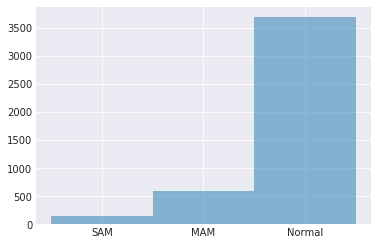

In [13]:
# mln_plot = sns.distplot(meta_data['maln_class'], bins=3, kde=False)  # kde_kws={'linewidth':1.0})
meta_data['maln_class_code'] = 0
meta_data.loc[meta_data['maln_class'] == 'normal', 'maln_class_code'] = 2
meta_data.loc[meta_data['maln_class'] == 'mam', 'maln_class_code'] = 1
plt.hist(meta_data['maln_class_code'], bins=[0, 1, 2, 3], align='left', alpha=0.5)
plt.xticks([0, 1, 2], ['SAM', 'MAM', 'Normal'])
plt.savefig(mclass_fig, dpi=400)

In [48]:
merged_df.shape

(4203, 2057)

In [49]:
merged_df.to_csv('/data/meron/kenya_data/meron_merged_mal(sam_mam_upsampled)_muac.csv', index=False)

missing_data=smart_encoder_feats[(~smart_encoder_feats['photo_id'].isin(merged_df['photo_id']))].drop_duplicates('photo_id', keep='first')

missing_data['photo_id'].to_csv('/data/meron/kenya_data/missing_photo_id.csv', index=False)

# merge data for WFH

In [13]:
select_cols2=['photo_id','gender_male', 'age_months', 'wfh']
merged_df_wfh=pd.merge(features, meta_data[select_cols2], on="photo_id").drop_duplicates('photo_id', keep='first')
print('size of the merged dataset: {}'.format(merged_df_wfh.shape))

size of the merged dataset: (3594, 2052)


In [14]:
merged_df_wfh.to_csv('/data/meron/kenya_data/meron_merge_wfh.csv', index=False)